In [1]:
!pip install -U tensorflow_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 883.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 4.0 MB/s eta 0:00:0000:01
  Created wheel for promise

In [ ]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

#tf.enable_eager_execution()

2.12.0


In [ ]:
dataset, metadata = tfds.load( 'fashion_mnist', as_supervised = True, with_info = True )
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePZH0G4/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePZH0G4/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print( 'Number of training examples: {}' . format( num_train_examples ) )
print( 'Number of test examples: {}' . format( num_test_examples ) )

Number of training examples: 60000
Number of test examples: 10000


In [ ]:
def normalize( images, labels ):
  images = tf.cast( images, tf.float32 )
  images /= 255
  return images, labels

# the map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map( normalize )
test_dataset = test_dataset.map( normalize )


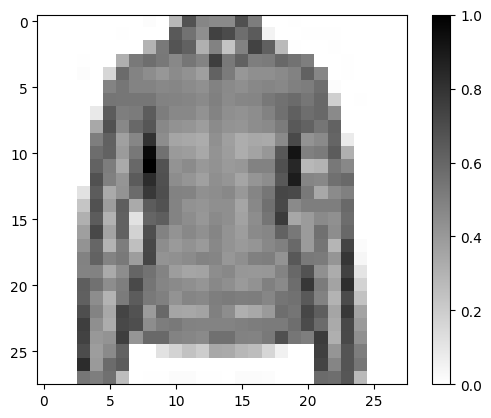

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape( ( 28, 28 ) )

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow( image, cmap = plt.cm.binary )
plt.colorbar()
plt.grid( False )
plt.show()

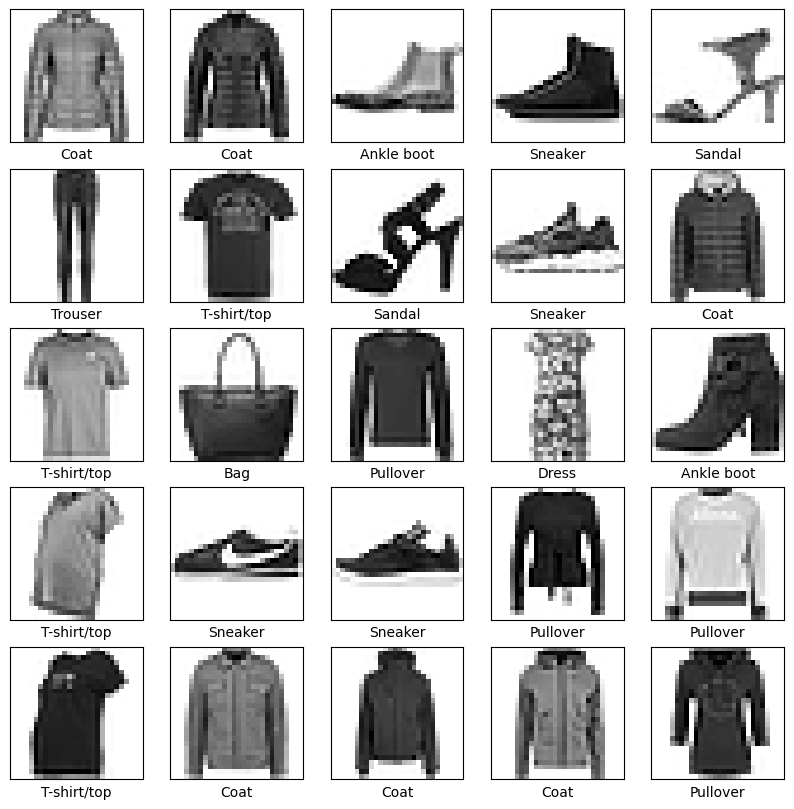

In [ ]:
plt.figure( figsize = ( 10, 10 ) )
i = 0
for ( image, label ) in test_dataset.take( 25 ):
  image = image.numpy().reshape( ( 28, 28 ) )
  plt.subplot( 5, 5, i+1 )
  plt.xticks( [] )
  plt.yticks( [] )
  plt.grid( False )
  plt.imshow( image, cmap = plt.cm.binary )
  plt.xlabel( class_names[label] )
  i += 1

plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape = ( 28, 28, 1 ) ),
    tf.keras.layers.Dense( 128, activation = tf.nn.relu ),
    tf.keras.layers.Dense( 10, activation = tf.nn.softmax )
])

In [ ]:
model.compile( optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = [ 'accuracy' ] )

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit( train_dataset, epochs = 5, steps_per_epoch = math.ceil( num_train_examples / BATCH_SIZE ) )

Epoch 1/5
1875/1875 [==============================] - 17s 6ms/step - loss: 0.4932 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3738 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3335 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3105 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2916 - accuracy: 0.8920


In [ ]:
test_loss, test_accuracy = model.evaluate( test_dataset, steps = math.ceil( num_test_examples / 32 ) )
print('Accuracy on test dataset: ', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3515 - accuracy: 0.8742
Accuracy on test dataset:  0.8741999864578247


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict( test_images )

1/1 [==============================] - 0s 105ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([5.5917390e-06, 7.6966336e-07, 3.6337927e-02, 1.1083459e-06,
       9.5104957e-01, 6.9374018e-10, 1.2595616e-02, 1.4408903e-09,
       9.3404797e-06, 5.1329465e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image( i, predictions_array, true_labels, images ):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid( False )
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[..., 0], cmap=plt.cm.binary)

  predicted_label = np.argmax( predictions_array )
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                      color=color)
  
def plot_value_array( i, predictions_array, true_label ):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid( False )
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim( [0, 1] )
  predicted_label = np.argmax( predictions_array )

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  

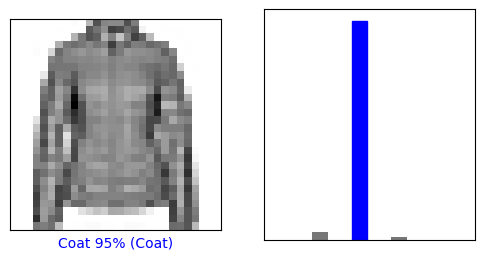

In [ ]:
i = 0
plt.figure( figsize = (6, 3) )
plt.subplot(1,2,1)
plot_image( i, predictions, test_labels, test_images )
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

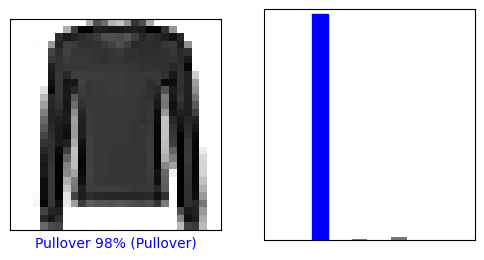

In [ ]:
i = 12
plt.figure( figsize = (6, 3) )
plt.subplot(1,2,1)
plot_image( i, predictions, test_labels, test_images )
plt.subplot(1,2,2)
plot_value_array( i, predictions, test_labels )

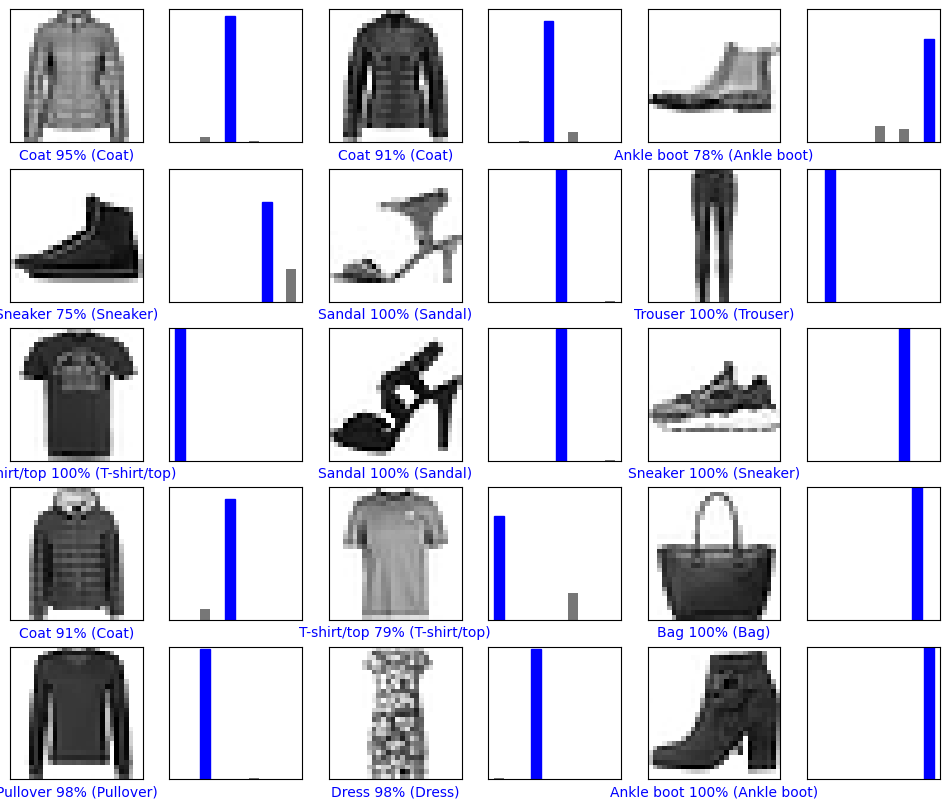

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range( num_images ):
  plt.subplot( num_rows, 2*num_cols, 2*i+1 )
  plot_image( i, predictions, test_labels, test_images )
  plt.subplot( num_rows, 2*num_cols, 2*i+2 )
  plot_value_array( i, predictions, test_labels )

In [ ]:
img = test_images[0]

print( img.shape )

(28, 28, 1)


In [ ]:
img = np.array([img])

print( img.shape )

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 64ms/step
[[5.5917285e-06 7.6966415e-07 3.6337908e-02 1.1083448e-06 9.5104957e-01
  6.9373757e-10 1.2595599e-02 1.4408903e-09 9.3404697e-06 5.1329366e-08]]


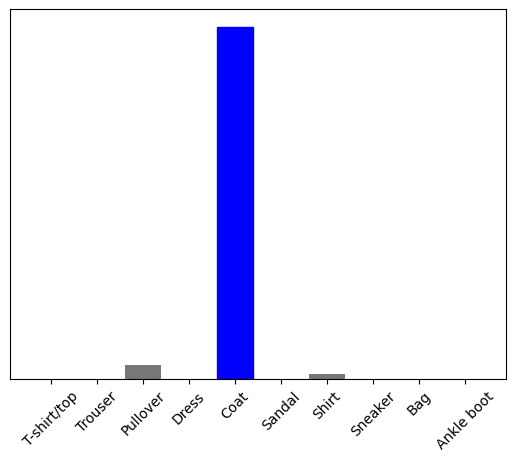

In [ ]:
plot_value_array( 0, predictions_single, test_labels )
_ = plt.xticks( range(10), class_names, rotation = 45 )

In [ ]:
np.argmax(predictions_single[0])

4

Hacer los siguientes ejercicios

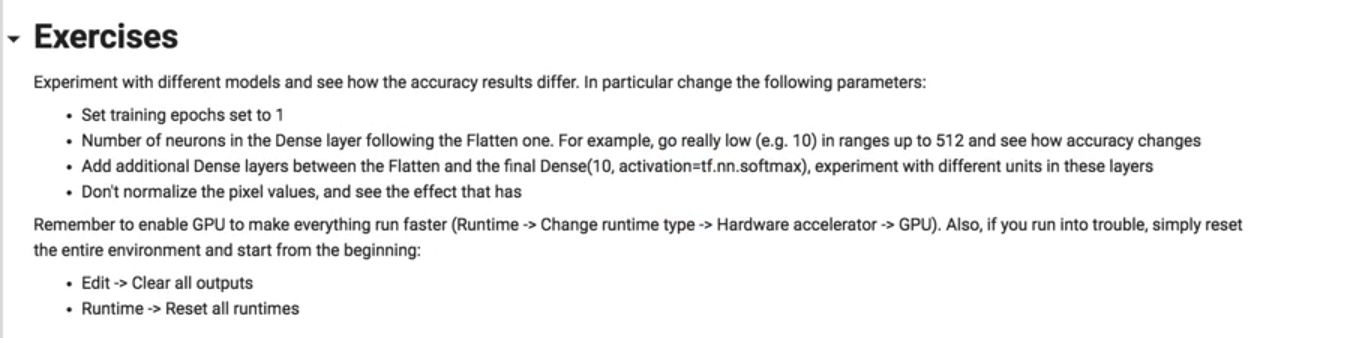